In [218]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [272]:
#cargamos nodos
nodos=pd.read_csv('quakers_nodelist.csv',header=None,
                 names=['Name','HistoricalSignificance','Birthdate','Deathdate','ID','Gender'])
#cargamos aristas
aristas=pd.read_csv('quakers_edgelist.csv',header=None,
                   names=['Source','Target'])
nodos.head(10)

,Name,HistoricalSignificance,Birthdate,Deathdate,ID,Gender
0,Joseph Wyeth,religious writer,1663,1731,10013191,male
1,Alexander Skene of Newtyle,local politician and author,1621,1694,10011149,male
2,James Logan,colonial official and scholar,1674,1751,10007567,male
3,Dorcas Erbery,Quaker preacher,1656,1659,10003983,female
4,Lilias Skene,Quaker preacher and poet,1626,1697,10011152,male
5,William Mucklow,religious writer,1630,1713,10008595,male
6,Thomas Salthouse,Quaker preacher and writer,1630,1691,10010643,male
7,William Dewsbury,Quaker activist,1621,1688,10003478,male
8,John Audland,Quaker preacher,1630,1664,10000411,male
9,Richard Claridge,Quaker minister and schoolmaster,1649,1723,10002469,male


In [273]:
aristas.head(10)

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
5,George Keith,George Fox
6,George Keith,George Whitehead
7,George Keith,William Bradford
8,James Parnel,Benjamin Furly
9,James Parnel,Stephen Crisp


In [275]:
#construimos el grafo
graph = nx.Graph()
#añadimos los nodos
for name,historicalSignificance,gender,birthdate,deathdate,Id in zip(nodos['Name'],nodos['HistoricalSignificance'],nodos['Gender'],nodos['Birthdate'],nodos['Deathdate'],nodos['ID']):
    graph.add_node(name, Name=name,HistoricalSignificance=historicalSignificance,Gender=gender,Birthdate=birthdate,Deathdate=deathdate,Id=Id)
#añadimos las aristas
for source,target in zip(aristas['Source'],aristas['Target']):
    graph.add_edge(source,target)
#print(list(graph.nodes))
#print(list(graph.edges))
#graph.nodes.data()
#graph.edges.data()
#graph.number_of_nodes()

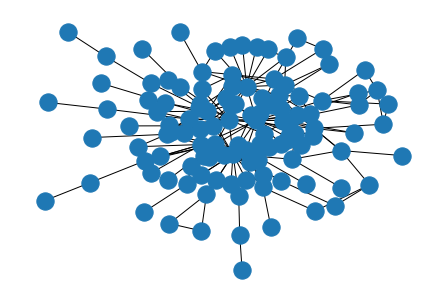

In [276]:
#dibujamos el grafo
nx.draw_kamada_kawai(graph)
plt.show()

In [277]:
#A esto hay que darle una vuelta
from sklearn import preprocessing

In [278]:
atributos = nodos.loc[:,'Name':'ID']
objetivo = nodos['Gender']

In [279]:
# Para realizar una codificación de los datos, se crea una instancia del tipo de
# codificación pretendida y se ajusta a los datos disponibles mediante el método fit.

codificador_atributos = preprocessing.OrdinalEncoder()
codificador_atributos.fit(atributos)

#Con este comando miras los valores que puede haber cuando el atributo ya esta codificado
#print(codificador_atributos.categories_)

OrdinalEncoder()

In [280]:
# Una vez ajustado el codificador, el método transform permite codificar los
# valores de los atributos
atributos_codificados = codificador_atributos.transform(atributos)
#print(atributos_codificados)

In [281]:
# El codificador adecuado para la variable objetivo es LabelEncoder, que trabaja
# con una lista o array unidimensional de sus valores
codificador_objetivo = preprocessing.LabelEncoder()
# El método fit_transform ajusta la codificación y la aplica a los datos justo
# a continuación
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)

In [282]:
# Clases detectadas por el codificador para la variable objetivo
print(codificador_objetivo.classes_)

['female' 'male']


In [283]:
#1 es male, 0 es female
print(objetivo_codificado)
# Las respuestas predichas por los modelos estarán codificadas, pero el codificador
# también permite descodificarlas
print(codificador_objetivo.inverse_transform([1, 0, 1]))

[1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 0]
['male' 'female' 'male']


In [284]:
# Cantidad total de ejemplos
#print(nodos.shape[0])
# Frecuencia total de cada clase de aceptabilidad (porcentaje de cada valor objetivo en nuestro conjunto)
print(pd.Series(objetivo).value_counts(normalize=True))

male      0.815126
female    0.184874
Name: Gender, dtype: float64


In [285]:
from sklearn import model_selection

In [286]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_codificados, objetivo_codificado,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=12345,
        # Tamaño del conjunto de prueba
        test_size=.20,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo_codificado)

In [287]:
#Comprobamos que tiene todo los valores correctos del conjunto de pruebas
print('Cantidad de ejemplos de pruebas requeridos:', 119 * .20)
print('Filas del array de atributos de prueba:', atributos_prueba.shape[0])
print('Longitud del vector de objetivos de prueba:', len(objetivo_prueba))
print('Proporción de clases en el vector de objetivos de prueba:')
print(pd.Series(
        codificador_objetivo.inverse_transform(objetivo_prueba)
      ).value_counts(normalize=True))

Cantidad de ejemplos de pruebas requeridos: 23.8
Filas del array de atributos de prueba: 24
Longitud del vector de objetivos de prueba: 24
Proporción de clases en el vector de objetivos de prueba:
male      0.833333
female    0.166667
dtype: float64


In [288]:
#Comprobamos que tiene todo los valores correctos del conjunto de pruebas
print('Cantidad de ejemplos de entrenamiento requeridos:', 119 * .80)
print('Filas del array de atributos de entrenamiento:', atributos_entrenamiento.shape[0])
print('Longitud del vector de objetivos de entrenamiento:', len(objetivo_entrenamiento))
print('Proporción de clases en el vector de objetivos de entrenamiento:')
print(pd.Series(# Comprobamos que el 
        codificador_objetivo.inverse_transform(objetivo_entrenamiento)
      ).value_counts(normalize=True))

Cantidad de ejemplos de entrenamiento requeridos: 95.2
Filas del array de atributos de entrenamiento: 95
Longitud del vector de objetivos de entrenamiento: 95
Proporción de clases en el vector de objetivos de entrenamiento:
male      0.810526
female    0.189474
dtype: float64


Para realizar aprendizaje supervisado en _sklearn_, basta crear una instancia de la clase de objetos que implemente el modelo que se quiera utilizar (_naive_ Bayes, árboles de decisión, _kNN_, etc.).

Cada una de estas instancias dispondrá de los siguientes métodos:
* El método `fit` permite entrenar el modelo, dados __por separado__ el conjunto de ejemplos de entrenamiento y la clase de cada uno de estos ejemplos.
* El método `predict` permite clasificar un nuevo ejemplo una vez entrenado el modelo.
* El método `score` calcula el rendimiento del modelo, dados __por separado__ el conjunto de ejemplos de prueba y la clase de cada uno de estos ejemplos.

In [289]:
#Hasta aqui lo he hemos hecho ha sido leer del csv los datos, meterlos en 1 conjunto de entrenamiento (80%)
#y otro de pruebas(20%), despues hemos codificado, estos datos para que sean utilizables por los modelos
#y ahora vamos a definir los modelos para hacer el entrenamiento de la maquina.
#El primero a utilizar será Naive Bayes
from sklearn import naive_bayes
#print(atributos_entrenamiento)
#print(objetivo_entrenamiento)
#Aqui hemos tenido que arreglar el dataset porque había algunas incongruencias, y hemos tenido que cambiar algunos datos,
#esto nos ha llevado 1 dia saber porque fallaba

In [290]:
#definimos nuestro parámetro de suavizado
clasif_NB = naive_bayes.CategoricalNB(alpha=1.0)
#llamamos al metodo .fit para entrenar nuestro modelo
clasif_NB.fit(atributos_entrenamiento, objetivo_entrenamiento)

CategoricalNB()

In [291]:
for clase, cantidad_ejemplos_clase, log_probabilidad_clase in zip(
    codificador_objetivo.classes_, clasif_NB.class_count_, clasif_NB.class_log_prior_):
        print(f'Cantidad de ejemplos para la clase {clase}: {cantidad_ejemplos_clase}')
        print(f'Logaritmo de la probabilidad aprendida para la clase {clase}: {log_probabilidad_clase}')

Cantidad de ejemplos para la clase female: 18.0
Logaritmo de la probabilidad aprendida para la clase female: -1.6635051337043762
Cantidad de ejemplos para la clase male: 77.0
Logaritmo de la probabilidad aprendida para la clase male: -0.21007146974685664


In [292]:
for i, atributo in enumerate(codificador_atributos.feature_names_in_):
    print(f'Cantidad de ejemplos para el atributo {atributo}:')
    print(pd.DataFrame(clasif_NB.category_count_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print(f'Logaritmos de las probabilidades aprendidas para el atributo {atributo}:')
    print(pd.DataFrame(clasif_NB.feature_log_prob_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print()

Cantidad de ejemplos para el atributo Name:
        Alexander Parker  Alexander Skene of Newtyle  Alice Curwen  Anne Camm  \
female               0.0                         0.0           1.0        0.0   
male                 1.0                         1.0           0.0        0.0   

        Anne Conway Viscountess Conway and Killultagh  Anthony Pearson  \
female                                            1.0              0.0   
male                                              0.0              1.0   

        Anthony Sharp  Benjamin Furly  Charles Marshall  Christopher Taylor  \
female            0.0             0.0               0.0                 0.0   
male              1.0             1.0               1.0                 1.0   

        ...  William Crouch  William Dewsbury  William Edmundson  \
female  ...             0.0               0.0                0.0   
male    ...             0.0               1.0                0.0   

        William Gibson  William Mead  William 

ValueError: Shape of passed values is (2, 64), indices imply (2, 65)

In [293]:
nuevos_ejemplos = pd.DataFrame([['Joseph Wyeth', 'religious writer', '1621', '1751', '10013191'],
                                    ['Lilias Skene', 'Quaker preacher and poet', '1676', '1697', '10011152']],
                                   columns=codificador_atributos.feature_names_in_)
nuevos_ejemplos

,Name,HistoricalSignificance,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,1621,1751,10013191
1,Lilias Skene,Quaker preacher and poet,1676,1697,10011152


In [294]:
predicciones = clasif_NB.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

ValueError: Found unknown categories ['1621', '1676'] in column 2 during transform

In [40]:
#Centralidad de personas más relacionadas
pd.DataFrame.from_dict(nx.algorithms.centrality.degree_centrality(graph), 
                       orient='index',
                       columns = ['grado_centralidad'])\
            .sort_values(['grado_centralidad'], 
                         ascending = False)\
            .head(10)

,grado_centralidad
George Fox,0.186441
William Penn,0.152542
James Nayler,0.135593
George Whitehead,0.110169
Margaret Fell,0.110169
Benjamin Furly,0.084746
Edward Burrough,0.076271
Thomas Ellwood,0.067797
George Keith,0.067797
Francis Howgill,0.059322


In [41]:
#Centralidad de personas más cercanas
pd.DataFrame.from_dict(nx.closeness_centrality(graph), 
                       orient='index', 
                       columns = ['centralidad_proximidad']) \
            .sort_values(['centralidad_proximidad'], ascending = False) \
            .head(10)

,centralidad_proximidad
George Fox,0.392221
William Penn,0.373088
George Whitehead,0.354088
Margaret Fell,0.338421
James Nayler,0.331095
George Keith,0.325460
Benjamin Furly,0.321357
Thomas Ellwood,0.302305
Edward Burrough,0.297599
Rebecca Travers,0.297599


In [42]:
#Centralidad de puentes
pd.DataFrame.from_dict(nx.algorithms.centrality.betweenness_centrality(graph), 
                       orient='index', 
                       columns = ['centralidad_intermedio'])\
            .sort_values(['centralidad_intermedio'], 
                         ascending = False)\
            .head(10)

,centralidad_intermedio
William Penn,0.239995
George Fox,0.236833
George Whitehead,0.126320
Margaret Fell,0.121068
James Nayler,0.104460
Benjamin Furly,0.064196
Thomas Ellwood,0.046191
George Keith,0.045007
John Audland,0.041649
Alexander Parker,0.038937
